In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')

In [224]:
BZ = pd.read_csv('Database/future_std/BZ_vol.csv', index_col=0)
only_vol = pd.read_csv('Files/only_vol.csv', index_col=0)
exterior = pd.read_csv('Files/exterior.csv', index_col=0)

only_vol = only_vol.iloc[:-2, :]
exterior = exterior.iloc[:-2, :]

BZ.index = pd.to_datetime(BZ.index)
only_vol.index = pd.to_datetime(only_vol.index)
exterior.index = pd.to_datetime(exterior.index)

pred = pd.concat([exterior['Predictions'], BZ.iloc[:, 1:]], axis=1).dropna()
truth = pd.concat([exterior['Ground Truths'], BZ.iloc[:, 1:]], axis=1).dropna()

In [225]:
from joblib import load

# 저장한 scaler 파일 경로
scaler_file = 'scaler_3.joblib'

# 저장된 scaler 객체 로드
loaded_scaler = load(scaler_file)

# 로드된 scaler 객체를 사용하여 데이터 변환
pred_inv = loaded_scaler.inverse_transform(pred)
truth_inv = loaded_scaler.inverse_transform(truth)

pred_inv=pd.DataFrame(pred_inv, columns=pred.columns, index=pred.index)
truth_inv=pd.DataFrame(truth_inv, columns=truth.columns, index=truth.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [227]:
truth_inv

,Ground Truths,Dow Jones
2005-05-27,0.076667,10542.55
2005-06-03,0.082247,10460.97
2005-06-10,0.092420,10512.63
2005-06-17,0.099630,10623.07
2005-06-24,0.104148,10297.84
2005-07-01,0.104169,10303.44
2005-07-08,0.099893,10449.14
2005-07-15,0.087810,10640.83
2005-07-22,0.081552,10651.18
2005-07-29,0.074237,10640.91


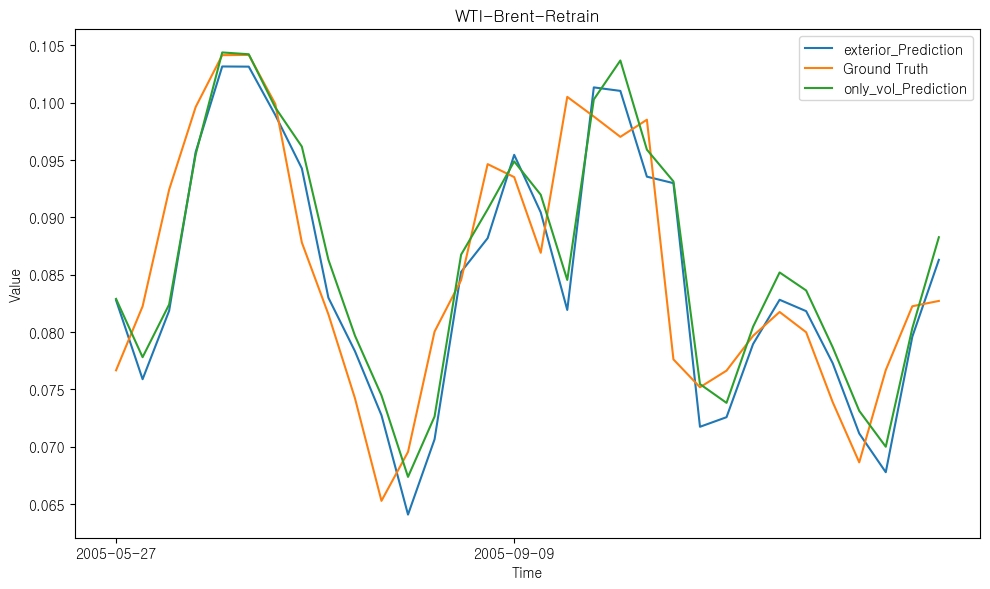

In [241]:
plt.figure(figsize=(10, 6))

plt.plot(pred_inv.iloc[:,0], label='exterior_Prediction')
plt.plot(truth_inv.iloc[:,0], label='Ground Truth')
plt.plot(only_vol['Predictions'], label='only_vol_Prediction')

plt.title('WTI-Brent-Retrain')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(only_vol.index[0:-2:15])
plt.tight_layout()
plt.show()

In [230]:
def calculate_mae(gt, output):
    mae = mean_absolute_error(gt, output)
    return mae


def calculate_rmse(gt, output):
    rmse = np.sqrt(mean_squared_error(gt, output))
    return rmse

In [213]:
gt2_v = only_vol.loc[:'2008-09-01', 'Ground Truths']
out2_v = only_vol.loc[:'2008-09-01', 'Predictions']

gt2 = truth_inv.loc[:'2008-09-01', 'Ground Truths']
out2 = pred_inv.loc[:'2008-09-01', 'Predictions']

In [212]:
gt_v = only_vol.loc['2008-09-01':'2009-01-01', 'Ground Truths']
out_v = only_vol.loc['2008-09-01':'2009-01-01', 'Predictions']

gt = truth_inv.loc['2008-09-01':'2009-01-01', 'Ground Truths']
out = pred_inv.loc['2008-09-01':'2009-01-01', 'Predictions']

In [238]:
gt3_v = only_vol.loc[:, 'Ground Truths']
out3_v = only_vol.loc[:, 'Predictions']

gt3 = truth_inv.loc[:, 'Ground Truths']
out3 = pred_inv.loc[:, 'Predictions']

In [239]:
print('only vol total')
print(calculate_mae(gt3_v.values, out3_v.values))
print(calculate_rmse(gt3_v.values, out3_v.values))

only vol total
0.004750303476827981
0.006112176273767366


In [240]:
print('exterior total')
print(calculate_mae(gt3.values, out3.values))
print(calculate_rmse(gt3.values, out3.values))

exterior total
0.004829708133019228
0.0063234628578327165


In [214]:
print('only vol 변동성 큰 부분')
print(calculate_mae(gt_v.values, out_v.values))
print(calculate_rmse(gt_v.values, out_v.values))

only vol 변동성 큰 부분
0.022122164764288244
0.02459956121898109


In [215]:
print('exterior 변동성 큰 부분')
print(calculate_mae(gt.values, out.values))
print(calculate_rmse(gt.values, out.values))

exterior 변동성 큰 부분
0.015357450908564855
0.02049310962819408


In [216]:
print('only vol 변동성 작은 부분')
print(calculate_mae(gt2_v.values, out2_v.values))
print(calculate_rmse(gt2_v.values, out2_v.values))

only vol 변동성 작은 부분
0.007572554422299692
0.0112290520546378


In [217]:
print('exterior 변동성 작은 부분')
print(calculate_mae(gt2.values, out2.values))
print(calculate_rmse(gt2.values, out2.values))

exterior 변동성 작은 부분
0.008574690465213978
0.012052578616838266
